### 선형으로 분리되는 데이타 실습하기

In [86]:
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

#### Custom Funtion Definition

In [6]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)



def get_colors(y):
    return [data_colors[label] for label in y]

def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test)) #concatenate 배열을 하나로 합침
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(8, 4))

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()

def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()  ## get current axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)   ## ravel()은 flatten() 함수
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])

#### 1. DataLoader

In [30]:
'''
SVM 알고리즘을 실습하기 위해서 노이즈(noise)전혀 없는 아주 깔끔하게 선형구분이 가능한 점들의 데이타
'''

X, labels = read_data('../data/points_class_0.txt','../data/points_class_1.txt')

#### 2. Data Split

In [31]:
#Split data to train and test on 80-20 ratio
# sklearn의 데이터를 가져오면 데이터가 섞여있지 않음.
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

#### 3. Model Generator and Training

In [50]:
clf = svm.SVC(kernel='linear') # clf = classifier
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### 4. Predict and Accuracy Score

In [51]:
clf_predict = clf.predict(X_test)
print(clf.score(X_test, y_test)*100)

100.0


In [52]:
accuracy_score(clf_predict, y_test) * 100

100.0

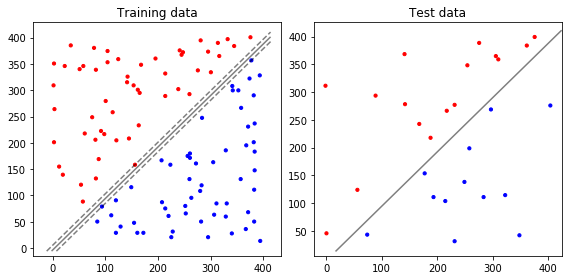

In [53]:
plot_decision_function(X_train, y_train, X_test, y_test,clf)

## 선형으로 분리되지 않는 데이터 실습하기 with grid search

## 2. Data Loader

In [7]:
X, labels = read_data('../data/points_class_0_nonLinear.txt', '../data/points_class_1_nonLinear.txt')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

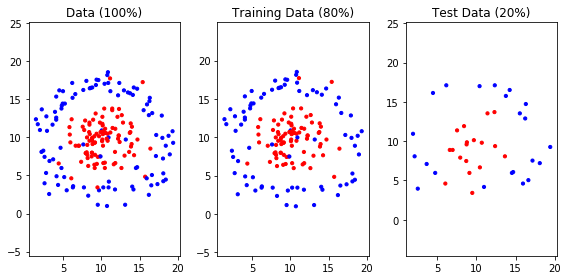

In [9]:
plot_data(X_train, y_train, X_test, y_test)

In [30]:
# # 가우시안 방사 기저함수 + cost + gamma
# model = svm.SVC(kernel='rbf', C=1, gamma=0.1) # radial bassis function
# model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
model = svm.SVC(kernel='rbf')
parameters = {'C':[0.01,0.1,0.4,0.5,0.6], 'gamma':[0.001,0.01,0.1,0.125,0.15,0.2,0.3,0.4,0.5,1]}

grid_model = GridSearchCV(model, parameters, cv=3, refit=True, verbose=1)
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.4, 0.5, 0.6],
                         'gamma': [0.001, 0.01, 0.1, 0.125, 0.15, 0.2, 0.3, 0.4,
                                   0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [97]:
score_df = pd.DataFrame(grid_model.cv_results_)
score_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.01, 'gamma': 0.001}",0.51250,36,0.518519,0.509434,0.509434
1,"{'C': 0.01, 'gamma': 0.01}",0.51250,36,0.518519,0.509434,0.509434
2,"{'C': 0.01, 'gamma': 0.1}",0.51250,36,0.518519,0.509434,0.509434
3,"{'C': 0.01, 'gamma': 0.125}",0.51250,36,0.518519,0.509434,0.509434
4,"{'C': 0.01, 'gamma': 0.15}",0.51250,36,0.518519,0.509434,0.509434
5,"{'C': 0.01, 'gamma': 0.2}",0.51250,36,0.518519,0.509434,0.509434
6,"{'C': 0.01, 'gamma': 0.3}",0.51250,36,0.518519,0.509434,0.509434
7,"{'C': 0.01, 'gamma': 0.4}",0.51250,36,0.518519,0.509434,0.509434
8,"{'C': 0.01, 'gamma': 0.5}",0.51250,36,0.518519,0.509434,0.509434
9,"{'C': 0.01, 'gamma': 1}",0.51250,36,0.518519,0.509434,0.509434


In [98]:
print("최적 파라미터 : ", grid_model.best_params_)
print('최고 정확도 :', grid_model.best_score_)

최적 파라미터 :  {'C': 0.4, 'gamma': 0.125}
최고 정확도 : 0.9375


In [99]:
estimator = grid_model.best_estimator_
predict = estimator.predict(X_test)
print("grid search 정확도: ",accuracy_score(predict, y_test))

grid search 정확도:  0.9


In [100]:
# clf_predict = model.predict(X_test)
# accuracy_score(clf_predict, y_test)

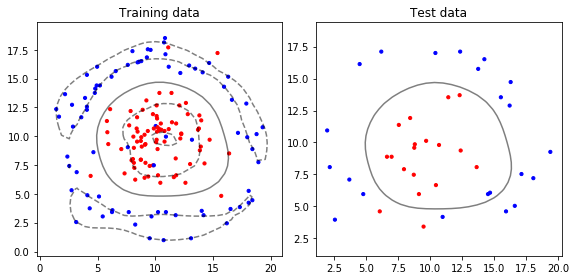

In [101]:
plot_decision_function(X_train, y_train, X_test, y_test, estimator)